In [1]:
import sklearn
from sklearn import datasets
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import word_tokenize        
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import time
from sklearn.feature_extraction import stop_words
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from zipfile import ZipFile
from sklearn.datasets import load_files

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tarfile
my_tar = tarfile.open('/content/drive/My Drive/COMP551_P2/aclImdb_v1.tar')
my_tar.extractall('./content/drive/My Drive/COMP551_P2/aclImdb') # specify which folder to extract to
my_tar.close()

In [0]:
movie_train=load_files('content/drive/My Drive/COMP551_P2/aclImdb/aclImdb/train/', description=None, 
                                        categories=['neg', 'pos'], load_content=True, shuffle=True,
                                        encoding=None, decode_error='strict', random_state=0)
movie_test=load_files('content/drive/My Drive/COMP551_P2/aclImdb/aclImdb/test/', description=None, 
                                        categories=['neg', 'pos'], load_content=True, shuffle=True,
                                        encoding=None, decode_error='strict', random_state=0)

In [0]:
class LemmaTokenizer:
     def __init__(self):
         self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
         return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

### Logistic Regression

In [0]:
stoplist = nltk.corpus.stopwords.words('english')
text_clf = Pipeline([
    ('vect', CountVectorizer(binary=True,lowercase=True)),
    ('norm',Normalizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',LogisticRegression()),
 ])

tuned_parameters= [{'clf__C':[1.0,1.5,2.0,2.5,3.0,4.0,5.0],'clf__tol': [1e-4],'clf__max_iter':[400],'clf__solver':['lbfgs']}]
t1_start = time.time() 
clf=GridSearchCV(text_clf, tuned_parameters, scoring='accuracy',cv=5, n_jobs=-1)
clf.fit(movie_train.data,movie_train.target)
print(clf.best_params_)
print(clf.cv_results_['rank_test_score'])
print(clf.cv_results_['mean_test_score'])
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)

{'clf__C': 3.0, 'clf__max_iter': 400, 'clf__solver': 'lbfgs', 'clf__tol': 0.0001}
[7 6 4 5 1 2 3]
[0.88872 0.89104 0.8928  0.89276 0.8934  0.89332 0.89324]
processing time is : 188.7863268852234


In [0]:
lg = LogisticRegression(C= 2.3, max_iter= 40000, solver= 'lbfgs', tol=0.00000000001)
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(lowercase=True, binary=True, tokenizer=LemmaTokenizer())
tfidf_transformer = TfidfTransformer()
#Train data retrieve
t1_start = time.time() 
X_train_counts = count_vect.fit_transform(movie_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
lg.fit(X_train_tfidf, movie_train.target)
#Test data retrieve
X_test_counts = count_vect.transform(movie_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

#Print the test accuracy
predicted = lg.predict(X_test_tfidf)
t1_end = time.time() 
print(classification_report(movie_test.target, predicted))
print('mean',np.mean(predicted==movie_test.target))
print('processing time is :',t1_end-t1_start)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12500
           1       0.89      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

mean 0.88996
processing time is : 145.623548746109


### Time Consumption

In [19]:
lg = LogisticRegression()
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(lowercase=True, binary=True, )
tfidf_transformer = TfidfTransformer()
#Train data retrieve
t1_start = time.time() 
X_train_counts = count_vect.fit_transform(movie_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
lg.fit(X_train_tfidf, movie_train.target)
#Test data retrieve
X_test_counts = count_vect.transform(movie_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

#Print the test accuracy
predicted = lg.predict(X_test_tfidf)
t1_end = time.time() 
print(classification_report(movie_test.target, predicted))
print('mean',np.mean(predicted==movie_test.target))
print('processing time is :',t1_end-t1_start)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     12500
           1       0.89      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

mean 0.88816
processing time is : 9.285634517669678


### DecisionTree

In [0]:
stoplist = nltk.corpus.stopwords.words('english')
text_clf = Pipeline([
    ('vect', CountVectorizer(lowercase=True, binary=True)),
    ('norm',Normalizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',tree.DecisionTreeClassifier()),
 ])

tuned_parameters= [{'clf__max_depth':[50,100,200,400,None],'clf__max_features':[None],'clf__splitter':['random','best']}]
t1_start = time.time() 
clf=GridSearchCV(text_clf, tuned_parameters, scoring='accuracy',cv=5, n_jobs=-1)
clf.fit(movie_train.data,movie_train.target)
print(clf.best_params_)
print(clf.cv_results_['rank_test_score'])
print(clf.cv_results_['mean_test_score'])
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)

{'clf__max_depth': 50, 'clf__max_features': None, 'clf__splitter': 'random'}
[ 1  2  6  9  4  7  3  8  5 10]
[0.71876 0.71496 0.709   0.70588 0.70948 0.70844 0.71432 0.7064  0.70944
 0.70508]
processing time is : 1290.9369015693665


### Test Accuracy

In [0]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(lowercase=True)
tfidf_transformer = TfidfTransformer()
t1_start = time.time()
X_train_counts = count_vect.fit_transform(movie_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(movie_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

DT_clf = tree.DecisionTreeClassifier(max_depth=200, max_features=None, max_leaf_nodes=160, splitter='random')
DT_clf=DT_clf.fit(X_train_tfidf,movie_train.target )
predicted = DT_clf.predict(X_test_tfidf)
t1_end = time.time() 
print(classification_report(movie_test.target, predicted))
print(np.mean(predicted ==movie_test.target))
print('processing time is :',t1_end-t1_start)

              precision    recall  f1-score   support

           0       0.75      0.73      0.74     12500
           1       0.74      0.76      0.75     12500

    accuracy                           0.74     25000
   macro avg       0.74      0.74      0.74     25000
weighted avg       0.74      0.74      0.74     25000

0.74332
processing time is : 17.570098876953125


### Time Consumption

In [15]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(lowercase=True,binary=True)
tfidf_transformer = TfidfTransformer()
t1_start = time.time()
X_train_counts = count_vect.fit_transform(movie_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(movie_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

DT_clf = tree.DecisionTreeClassifier()
DT_clf=DT_clf.fit(X_train_tfidf,movie_train.target )
predicted = DT_clf.predict(X_test_tfidf)
t1_end = time.time() 
print(classification_report(movie_test.target, predicted))
print(np.mean(predicted ==movie_test.target))
print('processing time is :',t1_end-t1_start)

              precision    recall  f1-score   support

           0       0.70      0.71      0.70     12500
           1       0.70      0.69      0.70     12500

    accuracy                           0.70     25000
   macro avg       0.70      0.70      0.70     25000
weighted avg       0.70      0.70      0.70     25000

0.69884
processing time is : 61.758042335510254


### AdaBoost


In [6]:
stoplist = nltk.corpus.stopwords.words('english')

text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words=stoplist,lowercase=True)),
    ('norm',Normalizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',AdaBoostClassifier()),
 ])

tuned_parameters= [{'clf__learning_rate':[0.1,0.2,0.5,1.0],'clf__n_estimators':[50,100]}]
t1_start = time.time() 
clf=GridSearchCV(text_clf, tuned_parameters, scoring='accuracy',cv=5, n_jobs=-1)
clf.fit(movie_train.data,movie_train.target)
print(clf.best_params_)
print(clf.cv_results_['rank_test_score'])
print(clf.cv_results_['mean_test_score'])
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)

{'clf__learning_rate': 1.0, 'clf__n_estimators': 100}
[8 6 7 5 4 2 3 1]
[0.72908 0.76716 0.7662  0.7944  0.79744 0.82256 0.80036 0.826  ]
processing time is : 921.0975720882416


In [0]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(lowercase=True,binary=True)
tfidf_transformer = TfidfTransformer()
X_train_counts = count_vect.fit_transform(movie_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(movie_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
t1_start = time.time() 
DT_clf = AdaBoostClassifier(learning_rate=0.5,n_estimators=200)
DT_clf=DT_clf.fit(X_train_tfidf,movie_train.target )
predicted = DT_clf.predict(X_test_tfidf)
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(movie_test.target, predicted))
print(np.mean(predicted ==movie_test.target))

processing time is : 121.67530393600464
              precision    recall  f1-score   support

           0       0.87      0.82      0.84     12500
           1       0.83      0.87      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

0.84616


### Time Consumption

In [13]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(lowercase=True,binary=True)
tfidf_transformer = TfidfTransformer()
t1_start = time.time() 
X_train_counts = count_vect.fit_transform(movie_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(movie_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

DT_clf = AdaBoostClassifier()
DT_clf=DT_clf.fit(X_train_tfidf,movie_train.target )
predicted = DT_clf.predict(X_test_tfidf)
t1_end = time.time() 
print(classification_report(movie_test.target, predicted))
print(np.mean(predicted ==movie_test.target))
print('processing time is :',t1_end-t1_start)

              precision    recall  f1-score   support

           0       0.82      0.77      0.80     12500
           1       0.79      0.83      0.81     12500

    accuracy                           0.80     25000
   macro avg       0.81      0.80      0.80     25000
weighted avg       0.81      0.80      0.80     25000

0.80444
processing time is : 39.12897181510925


### Linear SVC

In [0]:
stoplist = nltk.corpus.stopwords.words('english')

text_clf = Pipeline([
    ('vect', CountVectorizer(lowercase=True,binary=True,ngram_range=(1,2))),
    ('norm',Normalizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',LinearSVC()),
 ])

tuned_parameters= [{'clf__C': [0.1,0.2,0.3,0.4,0.5],'clf__loss':['squared_hinge'],'clf__tol':[1e-6,1e-9,1e-11],'clf__max_iter':[100000]}]
t1_start = time.time() 
clf=GridSearchCV(text_clf, tuned_parameters, scoring='accuracy',cv=5, n_jobs=-1)
clf.fit(movie_train.data,movie_train.target)
print(clf.best_params_)
print(clf.cv_results_['rank_test_score'])
print(clf.cv_results_['mean_test_score'])
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)

{'clf__C': 0.4, 'clf__loss': 'squared_hinge', 'clf__max_iter': 100000, 'clf__tol': 1e-06}
[13 13 13 10 10 10  7  7  7  1  1  1  4  4  4]
[0.89024 0.89024 0.89024 0.89336 0.89336 0.89336 0.89444 0.89444 0.89444
 0.89488 0.89488 0.89488 0.8946  0.8946  0.8946 ]
processing time is : 323.3012487888336


### Best Performance Test Accuracy

In [0]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(lowercase=True, ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()
t1_start = time.time() 
X_train_counts = count_vect.fit_transform(movie_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)
print(X_train_tfidf.shape)
X_test_counts = count_vect.transform(movie_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

SVC_clf = LinearSVC(C=0.50,loss='squared_hinge',max_iter=10000,tol= 0.000001)
SVC_clf=SVC_clf.fit(X_train_tfidf,movie_train.target )
predictedsvc1 = SVC_clf.predict(X_test_tfidf)
print(SVC_clf.score(X_train_tfidf, movie_train.target))
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(movie_test.target, predictedsvc1))
print(np.mean(predictedsvc1 ==movie_test.target))

(25000, 1513832)
0.9982
processing time is : 34.81890153884888
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     12500
           1       0.90      0.90      0.90     12500

    accuracy                           0.90     25000
   macro avg       0.90      0.90      0.90     25000
weighted avg       0.90      0.90      0.90     25000

0.9024


### Time Consumption

In [16]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(lowercase=True, binary=True)
tfidf_transformer = TfidfTransformer()
t1_start = time.time() 
X_train_counts = count_vect.fit_transform(movie_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)
print(X_train_tfidf.shape)
X_test_counts = count_vect.transform(movie_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

SVC_clf = LinearSVC()
SVC_clf=SVC_clf.fit(X_train_tfidf,movie_train.target )
predictedsvc1 = SVC_clf.predict(X_test_tfidf)
print(SVC_clf.score(X_train_tfidf, movie_train.target))
t1_end = time.time() 

print(classification_report(movie_test.target, predictedsvc1))
print(np.mean(predictedsvc1 ==movie_test.target))
print('processing time is :',t1_end-t1_start)


(25000, 74849)
0.99364
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

0.8778
processing time is : 8.945900917053223


### Random Forest

In [0]:
stoplist = nltk.corpus.stopwords.words('english')

text_clf = Pipeline([
    ('vect', CountVectorizer(lowercase=True,binary=True,max_features=30000,ngram_range=(1,2))),
    ('norm',Normalizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',RandomForestClassifier()),
 ])

tuned_parameters= [{'clf__n_estimators':[50,100,200,300],'clf__max_depth':[1,None]}]
t1_start = time.time() 
clf=GridSearchCV(text_clf, tuned_parameters, scoring='accuracy',cv=5, n_jobs=-1)
clf.fit(movie_train.data,movie_train.target)
print(clf.best_params_)
print(clf.cv_results_['rank_test_score'])
print(clf.cv_results_['mean_test_score'])
t1_end = time.time() 

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'clf__max_depth': None, 'clf__n_estimators': 300}
[8 7 6 5 4 3 2 1]
[0.71016 0.75384 0.7854  0.79424 0.83184 0.84944 0.85564 0.85592]


### Test Accuracy

In [0]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(stop_words=stoplist,lowercase=True)
tfidf_transformer = TfidfTransformer()
X_train_counts = count_vect.fit_transform(movie_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)
X_test_counts = count_vect.transform(movie_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
t1_start = time.time() 
RF_clf = RandomForestClassifier(max_depth=None,n_estimators= 300,n_jobs=-1)
RF_clf=RF_clf.fit(X_train_tfidf,movie_train.target )
predicted = RF_clf.predict(X_test_tfidf)
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(movie_test.target, predicted))
print(np.mean(predicted ==movie_test.target))

processing time is : 136.19334268569946
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     12500
           1       0.87      0.85      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

0.861


### Time Consumption

In [17]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(lowercase=True,binary=True)
tfidf_transformer = TfidfTransformer()
t1_start = time.time()
X_train_counts = count_vect.fit_transform(movie_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)
X_test_counts = count_vect.transform(movie_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
 
RF_clf = RandomForestClassifier()
RF_clf=RF_clf.fit(X_train_tfidf,movie_train.target )
predicted = RF_clf.predict(X_test_tfidf)
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(movie_test.target, predicted))
print(np.mean(predicted ==movie_test.target))

processing time is : 77.57410025596619
              precision    recall  f1-score   support

           0       0.82      0.85      0.84     12500
           1       0.84      0.82      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000

0.83312


### Multinomial NB


In [0]:
stoplist = nltk.corpus.stopwords.words('english')
stoplist.append('\n')
stoplist.append(' ')
stoplist.append('"')
stoplist.append('|')
stoplist.append('/')
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words=stoplist,lowercase=True)),
    ('norm',Normalizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',MultinomialNB()),
 ])

tuned_parameters= [{'clf__alpha':[0.01,0.015,0.0195,0.02,0.025,0.03,0.04,0.05]}]
t1_start = time.time() 
clf=GridSearchCV(text_clf, tuned_parameters, scoring='accuracy',cv=5, n_jobs=-1)
clf.fit(movie_train.data,movie_train.target)
print(clf.best_params_)
print(clf.cv_results_['rank_test_score'])
print(clf.cv_results_['mean_test_score'])
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)

{'clf__alpha': 0.05}
[8 7 6 5 4 3 2 1]
[0.85196 0.85448 0.85644 0.85676 0.85764 0.85888 0.86032 0.86124]
processing time is : 147.75551795959473


### Test Accuracy

In [0]:
stoplist = nltk.corpus.stopwords.words('english')

count_vect=CountVectorizer(stop_words=stoplist,lowercase=True, ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()
t1_start = time.time() 
X_train_counts = count_vect.fit_transform(movie_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(movie_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

RF_clf = MultinomialNB(alpha=0.5)
RF_clf=RF_clf.fit(X_train_tfidf,movie_train.target )
predicted = RF_clf.predict(X_test_tfidf)
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(movie_test.target, predicted))
print(np.mean(predicted ==movie_test.target))

processing time is : 0.3083958625793457
              precision    recall  f1-score   support

           0       0.84      0.89      0.87     12500
           1       0.89      0.83      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

0.86232


### Time Consumption

In [18]:
stoplist = nltk.corpus.stopwords.words('english')

count_vect=CountVectorizer(lowercase=True, binary=True)
tfidf_transformer = TfidfTransformer()
t1_start = time.time() 
X_train_counts = count_vect.fit_transform(movie_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(movie_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

RF_clf = MultinomialNB(alpha=0.5)
RF_clf=RF_clf.fit(X_train_tfidf,movie_train.target )
predicted = RF_clf.predict(X_test_tfidf)
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(movie_test.target, predicted))
print(np.mean(predicted ==movie_test.target))

processing time is : 8.35253381729126
              precision    recall  f1-score   support

           0       0.81      0.88      0.84     12500
           1       0.87      0.79      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.84      0.83      0.83     25000
weighted avg       0.84      0.83      0.83     25000

0.83448


### Overall Test Accuracy

In [0]:
types = ['alt.atheism','comp.graphics',
               'comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware',
               'comp.sys.ibm.pc.hardware','comp.windows.x','misc.forsale',
               'rec.autos','rec.motorcycles','rec.sport.baseball'
               ,'rec.sport.hockey','sci.crypt','sci.electronics','sci.med',
               'sci.space','soc.religion.christian','talk.politics.guns',
               'talk.politics.mideast','talk.politics.misc','talk.religion.misc']

In [0]:
train= sklearn.datasets.fetch_20newsgroups(subset='train',remove=(['headers','footers','quotes']),shuffle=True,random_state=42,categories=types)
test= sklearn.datasets.fetch_20newsgroups(subset='test',remove=(['headers','footers','quotes']),shuffle=True,random_state=42,categories=types)

In [0]:
stoplist = nltk.corpus.stopwords.words('english')
count_vect=CountVectorizer(stop_words=stoplist,lowercase=True,ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()
X_train_counts = count_vect.fit_transform(train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#Y_train_tfidf = tfidf_transformer.fit_transform(Y_train_counts)

X_test_counts = count_vect.transform(tests.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
t1_start = time.time() 
SVC_clf = LinearSVC(C=0.195,loss='squared_hinge',max_iter=100000,tol= 0.0001)
SVC_clf=SVC_clf.fit(X_train_tfidf,train.target )
predicted_svc2 = SVC_clf.predict(X_test_tfidf)
t1_end = time.time() 
print('processing time is :',t1_end-t1_start)
print(classification_report(tests.target, predicted_svc2))
print(np.mean(predicted_svc2 ==tests.target))

processing time is : 3.228790760040283
              precision    recall  f1-score   support

           0       0.54      0.42      0.47       319
           1       0.67      0.71      0.69       389
           2       0.67      0.67      0.67       394
           3       0.69      0.73      0.71       392
           5       0.82      0.73      0.78       395
           6       0.73      0.83      0.77       390
           7       0.80      0.71      0.75       396
           8       0.54      0.80      0.64       398
           9       0.82      0.80      0.81       397
          10       0.87      0.90      0.88       399
          11       0.85      0.74      0.79       396
          12       0.67      0.57      0.62       393
          13       0.79      0.79      0.79       396
          14       0.75      0.76      0.75       394
          15       0.58      0.84      0.68       398
          16       0.60      0.69      0.64       364
          17       0.83      0.77      0.8

### Best Performance Overall Test Accuracy (Linear SVC)

In [0]:
(np.mean(predictedsvc1 ==movie_test.target)*(np.shape(movie_test.target)[0])
                        +np.mean(predicted_svc2 ==test.target)*(np.shape(test.target)[0]))/(np.shape(movie_test.target)[0]+np.shape(test.target)[0])

0.8587737580489626

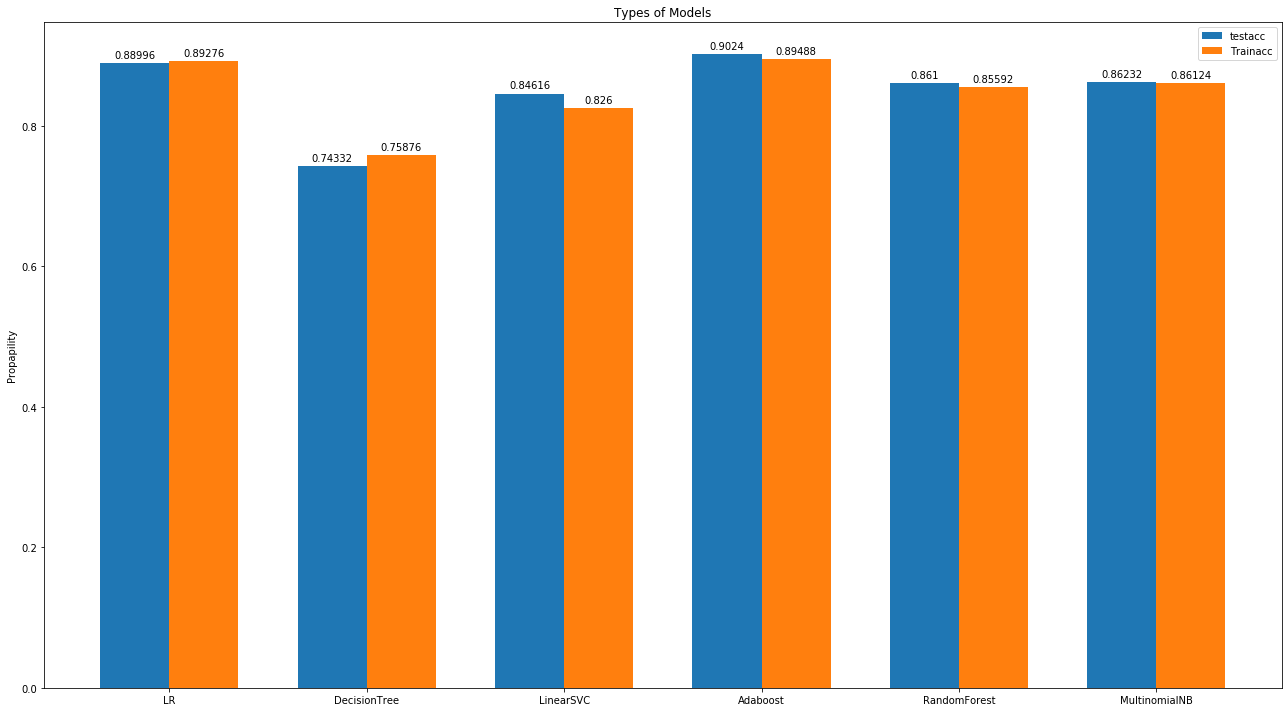

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['LR', 'DecisionTree', 'LinearSVC', 'Adaboost', 'RandomForest','MultinomialNB']
testacc= [0.88996,0.74332,0.84616,0.9024,0.86100,0.86232]
Trainacc= [0.89276,0.75876,0.826,0.89488,0.85592,0.86124]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, testacc, width, label='testacc')
rects2 = ax.bar(x + width/2, Trainacc, width, label='Trainacc')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Propapility')
ax.set_title('Types of Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.set_size_inches(18,10)
fig.tight_layout()
plt.savefig('plot_name.jpg', dpi = 300)
plt.show()